In [2]:
# Import des bibliothèques de manipulation et visualisation
import pandas as pd # Permet de manipuler des tableaux de données (DataFrames) et de lire des fichiers CSV ou Excel.

import numpy as np # Offre des outils mathématiques performants pour gérer les calculs sur des tableaux numériques et des matrices.

import matplotlib.pyplot as plt # Bibliothèque de base pour créer des graphiques et des visualisations statiques en 2D.

import seaborn as sns # Extension de matplotlib facilitant la création de graphiques statistiques plus esthétiques et complexes.

#Préparation des données

from sklearn.model_selection import train_test_split # Fournit une fonction pour diviser automatiquement votre jeu de données en un ensemble d'entraînement et un ensemble de test.

#Mesures de performance (Métriques)

from sklearn.metrics import accuracy_score # Importe la fonction pour calculer le taux global de bonnes réponses (exactitude).

from sklearn.metrics import recall_score # Importe la fonction pour mesurer le rappel (capacité à détecter tous les cas positifs).

from sklearn.metrics import f1_score # Importe la fonction pour calculer le score F1, l'équilibre entre précision et rappel.

from sklearn.metrics import precision_score # Importe la fonction pour mesurer la précision (fiabilité des prédictions positives).

from sklearn.metrics import balanced_accuracy_score # Importe la fonction pour calculer l'exactitude équilibrée, utile si vos classes ne sont pas de taille égale.

from sklearn.metrics import matthews_corrcoef # Importe le coefficient de Matthews, une mesure de qualité très fiable même sur des données déséquilibrées.

from sklearn.metrics import classification_report # Importe l'outil qui génère un rapport texte complet avec les principales métriques pour chaque classe.



In [3]:
# Chargement du fichier CSV
df = pd.read_csv("transactions.csv")
print(f"Fichier chargé avec succès ! Le tableau contient {df.shape[0]} lignes et {df.shape[1]} colonnes.") # Affiche une confirmation textuelle avec les dimensions exactes du DataFrame.
print(df.head()) # Affiche les 5 premières lignes pour vérifier que les données et les colonnes sont correctement alignées.

Fichier chargé avec succès ! Le tableau contient 299695 lignes et 17 colonnes.
   transaction_id  user_id  account_age_days  total_transactions_user  \
0               1        1               141                       47   
1               2        1               141                       47   
2               3        1               141                       47   
3               4        1               141                       47   
4               5        1               141                       47   

   avg_amount_user  amount country bin_country channel merchant_category  \
0           147.93   84.75      FR          FR     web            travel   
1           147.93  107.90      FR          FR     web            travel   
2           147.93   92.36      FR          FR     app            travel   
3           147.93  112.47      FR          FR     web           fashion   
4           147.93  132.91      FR          US     web       electronics   

   promo_used  avs_match 

In [4]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
299690,299691,6000,996,45,27.93,34.07,ES,ES,web,grocery,0,1,1,0,2024-09-29T04:40:54Z,218.55,0
299691,299692,6000,996,45,27.93,68.56,ES,ES,app,travel,0,1,1,1,2024-10-03T08:49:02Z,185.55,0
299692,299693,6000,996,45,27.93,25.02,ES,ES,app,fashion,0,1,1,1,2024-10-26T07:40:38Z,33.50,0
299693,299694,6000,996,45,27.93,23.92,ES,ES,web,gaming,0,0,0,0,2024-10-27T09:31:56Z,71.75,0
299694,299695,6000,996,45,27.93,26.07,ES,ES,web,gaming,1,1,1,1,2024-10-30T11:10:23Z,355.83,0


## Résumé structurel du dataset

Le dataset contient **299 695 transactions** et **17 variables**, sans valeurs manquantes.
La structure est cohérente et directement exploitable pour une analyse exploratoire avancée et la modélisation.

---

### Dimensions
- **Nombre de lignes** : 299 695
- **Nombre de colonnes** : 17
- **Mémoire utilisée** : ~38,9 MB
- **Index** : `RangeIndex` (0 à 299 694)

---

### Répartition des types de variables
- **Variables numériques continues (`float64`)** : 3
- **Variables numériques discrètes / binaires (`int64`)** : 9
- **Variables catégorielles (`object`)** : 5

---

### Détail des colonnes par type

#### Identifiants
- **transaction_id** (`int64`) : identifiant unique de la transaction
- **user_id** (`int64`) : identifiant utilisateur

#### Variables numériques continues
- **avg_amount_user** (`float64`) : montant moyen des transactions de l’utilisateur
- **amount** (`float64`) : montant de la transaction
- **shipping_distance_km** (`float64`) : distance géographique de livraison

#### Variables numériques discrètes / binaires
- **account_age_days** (`int64`) : ancienneté du compte en jours
- **total_transactions_user** (`int64`) : nombre total de transactions utilisateur
- **promo_used** (`int64`) : utilisation d’un code promotionnel (0/1)
- **avs_match** (`int64`) : correspondance AVS (0/1)
- **cvv_result** (`int64`) : validation CVV (0/1)
- **three_ds_flag** (`int64`) : authentification 3D Secure (0/1)
- **is_fraud** (`int64`) : variable cible (0 = légitime, 1 = fraude)

#### Variables catégorielles
- **country** (`object`) : pays de l’utilisateur
- **bin_country** (`object`) : pays du BIN de la carte bancaire
- **channel** (`object`) : canal de paiement (web, app, etc.)
- **merchant_category** (`object`) : catégorie du commerçant
- **transaction_time** (`object`) : date et heure de la transaction (UTC)

---

### Qualité des données
- **Valeurs manquantes** : aucune
- **Types cohérents** avec une problématique de détection de fraude
- **Variable temporelle** à convertir en `datetime` pour extraction de features (heure, jour, cyclicité)

---

### Lecture métier initiale
Le dataset combine :
- des **signaux comportementaux utilisateur**,
- des **informations transactionnelles**,
- des **indicateurs de sécurité**,
- des **éléments géographiques et temporels**.

Il est bien adapté à une **approche de classification binaire déséquilibrée**, avec un fort potentiel de **feature engineering** et d’**interprétabilité via SHAP**.


In [5]:
df.isna().sum().sort_values(ascending=False)
df.isna().mean().sort_values(ascending=False)

transaction_id             0.0
user_id                    0.0
account_age_days           0.0
total_transactions_user    0.0
avg_amount_user            0.0
amount                     0.0
country                    0.0
bin_country                0.0
channel                    0.0
merchant_category          0.0
promo_used                 0.0
avs_match                  0.0
cvv_result                 0.0
three_ds_flag              0.0
transaction_time           0.0
shipping_distance_km       0.0
is_fraud                   0.0
dtype: float64

In [6]:
df.duplicated().sum()

np.int64(0)

Le tableau montre qu’aucune colonne du dataset ne contient de valeurs manquantes, ce qui indique des données complètes et directement exploitables pour l’analyse et la modélisation.


In [7]:
df["is_fraud"].value_counts()
df["is_fraud"].value_counts(normalize=True)

is_fraud
0    0.977938
1    0.022062
Name: proportion, dtype: float64

<Axes: xlabel='is_fraud', ylabel='count'>

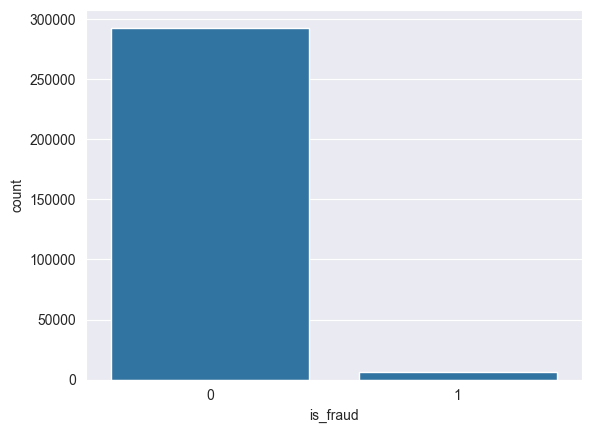

In [8]:
import seaborn as sns
sns.countplot(data=df, x="is_fraud")


La variable cible `is_fraud` est fortement déséquilibrée, avec environ 97,8 % de transactions non frauduleuses contre 2,2 % de fraudes.
Ce déséquilibre de classes nécessite l’usage de métriques adaptées (recall, F1, ROC-AUC) et de techniques spécifiques pour l’entraînement des modèles.

In [9]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

num_cols, cat_cols

(Index(['transaction_id', 'user_id', 'account_age_days',
        'total_transactions_user', 'avg_amount_user', 'amount', 'promo_used',
        'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km',
        'is_fraud'],
       dtype='object'),
 Index(['country', 'bin_country', 'channel', 'merchant_category',
        'transaction_time'],
       dtype='object'))

Le dataset est composé de variables numériques et binaires (identifiants, montants, signaux de sécurité, distance, cible `is_fraud`) ainsi que de variables catégorielles et temporelles (pays, canal, catégorie marchand, temps).
Cette séparation implique des traitements distincts en preprocessing, notamment l’encodage des variables catégorielles et la transformation de la variable temporelle avant la modélisation.

In [10]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
transaction_id,299695.0,149848.000000,86514.638800,1.00,74924.50,149848.00,224771.50,299695.00
user_id,299695.0,3002.559432,1732.309663,1.00,1501.00,3007.00,4504.00,6000.00
account_age_days,299695.0,973.397871,525.241409,1.00,516.00,975.00,1425.00,1890.00
total_transactions_user,299695.0,50.673321,5.976391,40.00,46.00,51.00,56.00,60.00
avg_amount_user,299695.0,148.142973,200.364624,3.52,46.19,90.13,173.45,4565.29
amount,299695.0,177.165279,306.926507,1.00,42.10,89.99,191.11,16994.74
promo_used,299695.0,0.153640,0.360603,0.00,0.00,0.00,0.00,1.00
avs_match,299695.0,0.837999,0.368453,0.00,1.00,1.00,1.00,1.00
cvv_result,299695.0,0.872110,0.333968,0.00,1.00,1.00,1.00,1.00
three_ds_flag,299695.0,0.784588,0.411109,0.00,1.00,1.00,1.00,1.00


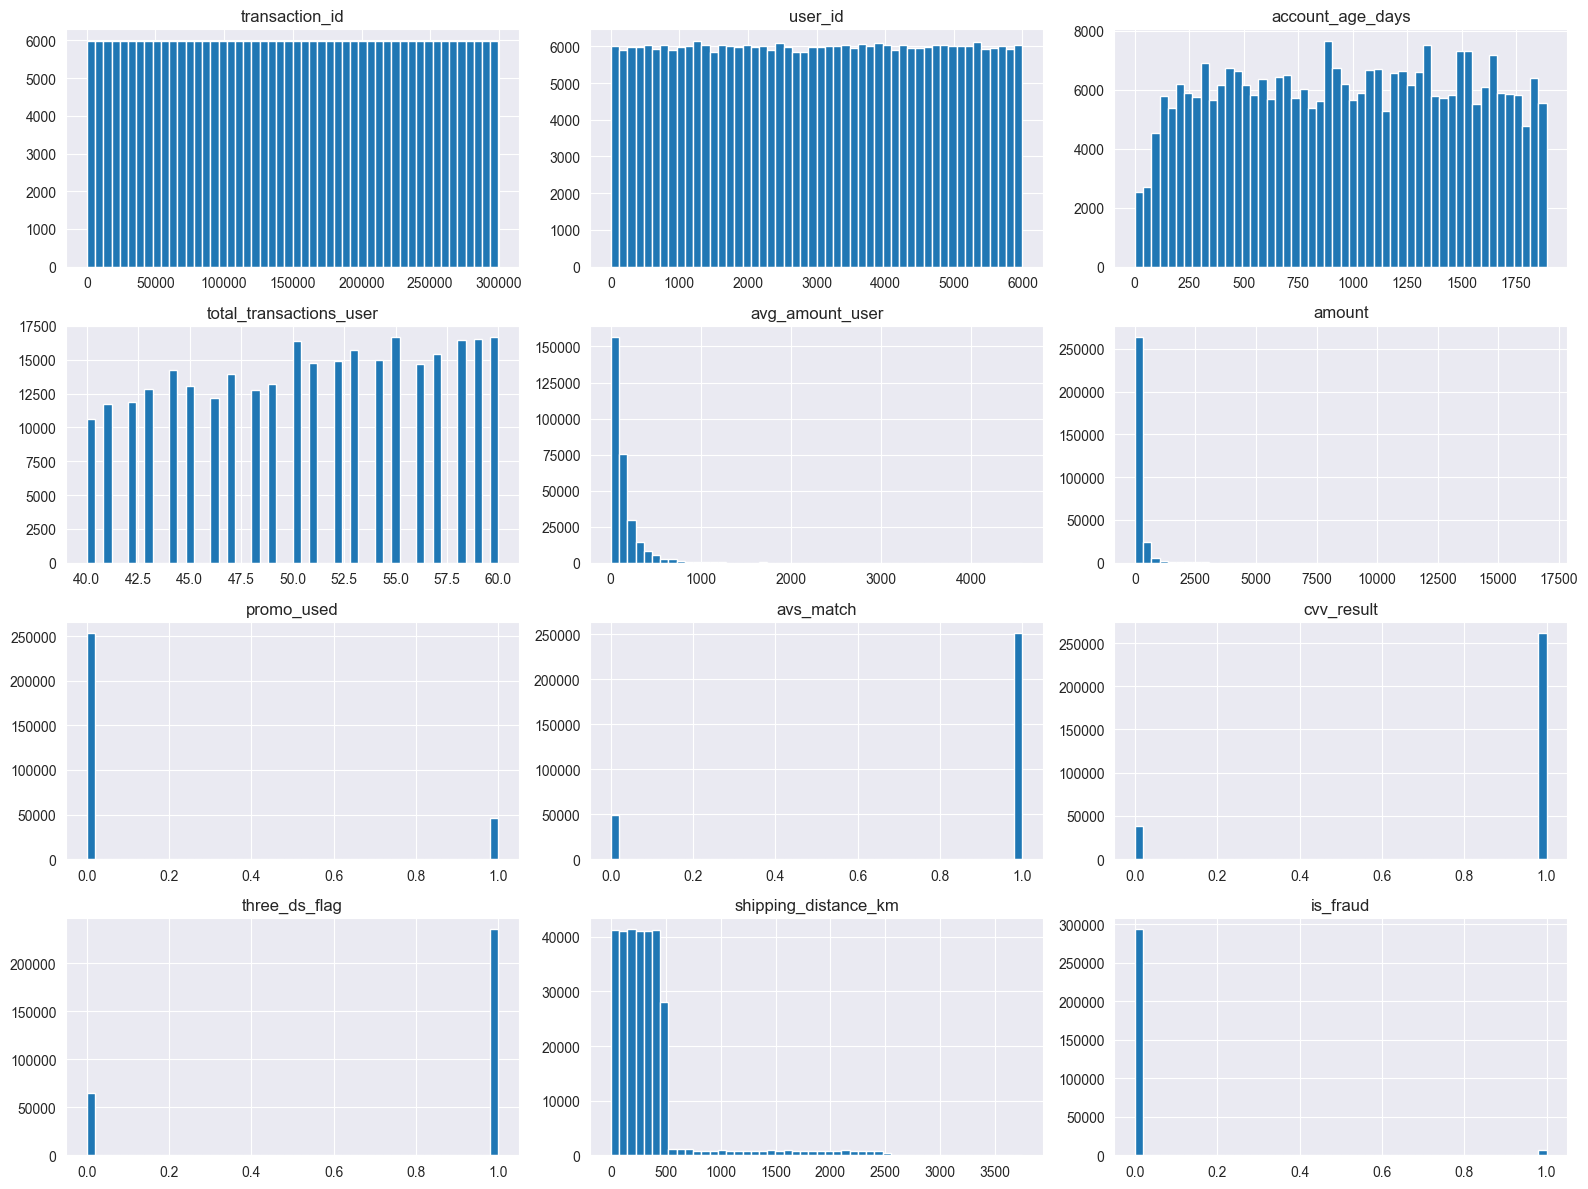

In [11]:
df[num_cols].hist(figsize=(16,12), bins=50)
plt.tight_layout()

Les distributions montrent des variables continues très asymétriques (amount, avg_amount_user, shipping_distance_km) avec des valeurs extrêmes, tandis que les variables binaires (promo_used, avs_match, cvv_result, three_ds_flag, is_fraud) sont fortement déséquilibrées.
Nécessitant normalisation, gestion des outliers et une attention particulière au déséquilibre de la cible.

<Axes: >

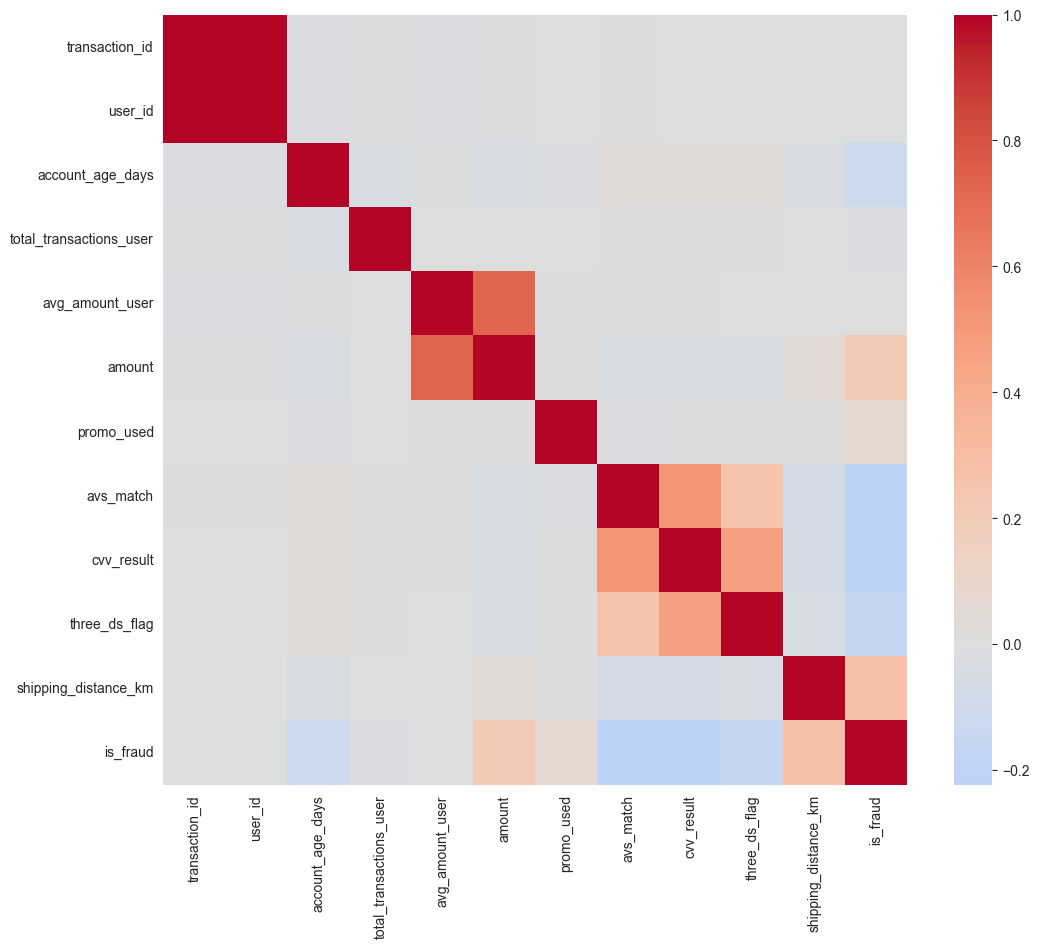

In [12]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)

## Début du Feature Engineering

Les analyses exploratoires mettent en évidence des distributions asymétriques, des valeurs extrêmes et un fort déséquilibre de la variable cible, ce qui justifie la création de nouvelles variables plus informatives.
Le feature engineering vise ici à transformer les signaux bruts (montants, comportements utilisateurs, contrôles de sécurité, distance) en indicateurs comportementaux et contextuels mieux adaptés à la détection de fraude.

In [13]:
df["transaction_time"] = pd.to_datetime(df["transaction_time"])
# Conversion de la colonne 'transaction_time' au format datetime afin de manipuler correctement
# les informations temporelles (date et heure exactes de chaque transaction) et permettre
# l’extraction de features temporelles (heure, jour, mois, etc.)

In [14]:
df = df.sort_values(["user_id", "transaction_time"]).reset_index(drop=True)
# Trie les transactions par utilisateur et par date.

In [15]:

df["hour"] = df["transaction_time"].dt.hour #on extrait l'heure de la transaction pour repérer les périodes ou la fraude est plus fréquente #OK

df["dayofweek"] = df["transaction_time"].dt.dayofweek #on extrait le jour de la semaine pour voir si certaine journée (comme le week end) on plus de fraude #OK


df["is_night"] = ((df["hour"] >= 22) | (df["hour"] <= 5)) * 1 #ici création d'une variable qui vaudra 1 si la transaction a lieu la nuit (de 22h a 5h du matin) le test logique  donnera "True" si entre 0 et 5 sinon False et ensuite transformation du resultat en 1/0  utilisable par un modele #OK

df["avg_amount_user_past"] = (df.groupby("user_id")["amount"].expanding().mean().shift(1).reset_index(level=0, drop=True)) # calcule la somme cumulée et le nombre de transactions passées, on les divise, et on obtient la moyenne passée sans aucune donnée future.

df["amount_diff_user_avg"] = df["amount"] - df["avg_amount_user_past"]# mesure si le montant actuel est différent du montant moyen habituel de l'utilisateur # OK

df["is_new_account"] = (df["account_age_days"] < 30) * 1 #verifie si c'est un nouveau compte ou pas , test logique pour voir si il a moin de 30 jour et transformation du resultat en 1/0 #OK

df["security_mismatch_score"] = (df["avs_match"] == 0) * 1 + (df["cvv_result"] == 0) * 1 # ici ca calcule un score de risque en comptant combien de vérification on échoué (avs ou cvv) un total de 0,1,2 #OK
#________________________________________________________________________________________________________________________________________
df["user_fraud_count"] = (df.groupby("user_id")["is_fraud"].cumsum().shift(1).fillna(0)) #calcul combien de fraudes un utilisateur a deja fait au total #ok

df["user_has_fraud_history"] = (df["user_fraud_count"] > 0) * 1 # montre si l'utilisateur a deja fraudé au moin 1 fios 0/1

df["user_tx_count"] = df.groupby("user_id").cumcount() #combien de transaction l'utilisateur avait avant celle ci (compteur historique)

df["user_fraud_rate"] = (df["user_fraud_count"] / df["user_tx_count"]).fillna(0) #nombre de fraude déjà commises avant celle ci
df["user_fraud_rate"] = df["user_fraud_rate"].replace([np.inf, -np.inf], 0)


#_________________________________________________________________________________________________________________________________________

df["country_bin_mismatch"] = (df["country"] != df["bin_country"]) * 1 #verifie que le pays de la carte (le bin) ne correspond pas au pays de la transaction 0/1

df["distance_amount_ratio"] = df["shipping_distance_km"] / (df["amount"] + 1) #mesure si la distance dexpedition est plus importante que le montant de la transaction

df["amount_delta_prev"] = df.groupby("user_id")["amount"].diff().fillna(0) #mesure la différence entre le montant actuel et le montant de la transaction précédente du meme utilisateur pour reperer les changement de comportement
#__________________________________________________________________________________________________________________________________________
df["channel_changed"] = (df["channel"] != df.groupby("user_id")["channel"].shift()).astype(int)# vaux 1 si le canal de transaction change #BINAIRE NECESSAIRE

#__________________________________________________________________________________________________________________________________________
df["time_since_last"] = df.groupby("user_id")["transaction_time"].diff().dt.total_seconds() #mesure le nombre de secondes entre la transaction actuelle et la derniere

df["transaction_count_cum"] = df.groupby("user_id").cumcount() + 1
#________________________________________________________________________________________________________________________________

In [16]:
# Tri (Toujours nécessaire)
df = df.sort_values(["user_id", "transaction_time"])

#  Fonction corrigée sans shift, avec closed='left'
def get_rolling_count_safe(g, window):
    # closed='left' signifie : regarde du passé jusqu'à maintenant,
    # mais EXCLUT la transaction actuelle du compte.
    return pd.Series(
        g.set_index("transaction_time")["amount"]
         .rolling(window, closed='left')
         .count()
         .values,
        index=g.index
    )

#  Application
# On sélectionne les colonnes avant le apply pour éviter les warnings/erreurs
cols_needed = ["transaction_time", "amount"]

df["tx_last_24h"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "24h")
)

df["tx_last_7d"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "7d")
)

df["tx_last_30d"] = df.groupby("user_id", group_keys=False)[cols_needed].apply(
    lambda g: get_rolling_count_safe(g, "30d")
)

# Remplacer les NaN (premières lignes) par 0
df[["tx_last_24h", "tx_last_7d", "tx_last_30d"]] = df[["tx_last_24h", "tx_last_7d", "tx_last_30d"]].fillna(0)

In [18]:
df = df.drop(columns=["transaction_time"]) #Suppression de la colonne transaction time
df.drop(columns=["transaction_id"], inplace=True)
df = pd.get_dummies(
    df, columns=["country", "bin_country", "channel", "merchant_category",],
    drop_first=False
)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, classification_report
# Target
y = df["is_fraud"]

# Features (tout sauf la target)
X = df.drop(columns=["is_fraud"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Poids de classe (déséquilibre)
class_weight = {
    0: 1,
    1: (y_train == 0).sum() / (y_train == 1).sum()
}

# Pipeline
model = Pipeline(steps=[
    (
        "imputer",
        SimpleImputer(strategy="median")  # robuste pour fraude
    ),
    (
        "logreg",
        LogisticRegression(
            penalty="l2",
            C=1.0,
            solver="liblinear",
            class_weight=class_weight,
            max_iter=1000,
            random_state=42
        )
    )
])


In [25]:
df["time_since_last"] = df["time_since_last"].fillna(0)

In [26]:
# 1. Train
model.fit(X_train, y_train)

# 2. Predict
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# 3. Metrics
print("===== TRAIN RESULTS =====")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print("Recall   :", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1-score :", f1_score(y_train, y_train_pred))

print("\n===== TEST RESULTS =====")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))

===== TRAIN RESULTS =====
Accuracy : 0.927422045746509
Recall   : 0.9039697542533082
Precision: 0.22062283737024221
F1-score : 0.35468199517893567

===== TEST RESULTS =====
Accuracy : 0.9279434091326182
Recall   : 0.8925869894099848
Precision: 0.2202725406010827
F1-score : 0.3533463093277437


Les performances de la régression logistique sont limitées dans un contexte de détection de fraude fortement déséquilibré.
Malgré un **recall élevé (~0.89)** indiquant que la majorité des fraudes sont détectées, la **precision très faible (~0.22)** génère un volume important de faux positifs, rendant le modèle difficilement exploitable opérationnellement.
L’accuracy proche de 93 % est peu informative et principalement due à la dominance de la classe non frauduleuse.
Le **F1-score autour de 0.35** traduit un compromis global insuffisant entre détection et qualité des alertes.
Ces résultats confirment que la régression logistique constitue une **baseline simple et interprétable**, mais qu’elle n’est pas adaptée seule à un système de détection de fraude en production.


,feature,importance
20,user_fraud_rate,1.668017e+00
18,user_has_fraud_history,1.552496e+00
15,is_new_account,1.288108e+00
6,avs_match,1.242441e+00
50,channel_app,9.910469e-01
8,three_ds_flag,8.775658e-01
21,country_bin_mismatch,8.606795e-01
16,security_mismatch_score,5.984435e-01
51,channel_web,5.429147e-01
40,bin_country_DE,3.046260e-01


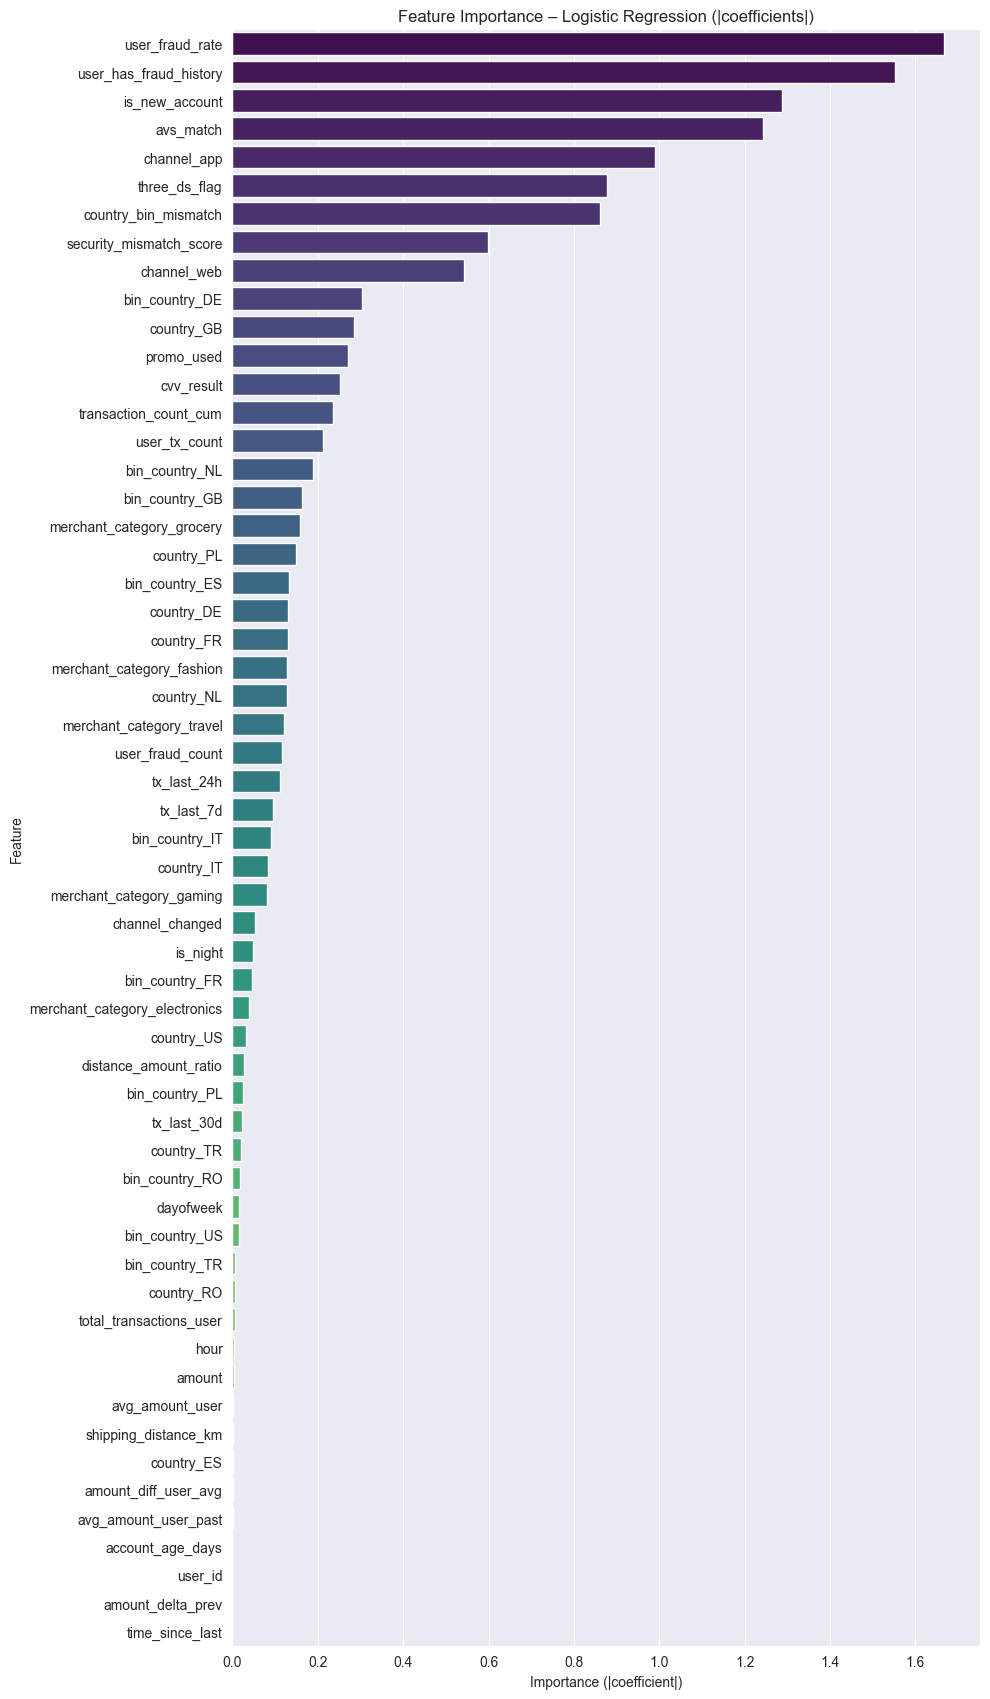

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===============================
# Récupération des importances – Logistic Regression
# ===============================

# Si ton modèle est un Pipeline (imputer + logreg)
logreg = model.named_steps["logreg"]

# Coefficients de la régression logistique
coefficients = np.abs(logreg.coef_[0])   # valeur absolue = importance

# DataFrame trié
importance_df = pd.DataFrame(
    {
        "feature": X_train.columns,
        "importance": coefficients
    }
).sort_values(
    "importance",
    ascending=False
)

# Affichage du tableau complet
display(importance_df)

# ===============================
# Plot propre (sans warning)
# ===============================
plt.figure(figsize=(10, len(importance_df) * 0.3))  # hauteur auto-adaptée

sns.barplot(
    data=importance_df,
    x="importance",
    y="feature",
    hue="feature",        # évite le warning seaborn
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.title("Feature Importance – Logistic Regression (|coefficients|)")
plt.xlabel("Importance (|coefficient|)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Ce graphique présente l’importance des variables du modèle de **régression logistique**, mesurée par la **valeur absolue des coefficients**.
Les variables liées à l’**historique utilisateur** (`user_fraud_rate`, `user_has_fraud_history`, `is_new_account`) dominent largement, montrant que le modèle repose principalement sur des signaux comportementaux globaux.
Les indicateurs de **sécurité et de cohérence transactionnelle** (`avs_match`, `three_ds_flag`, `security_mismatch_score`, `country_bin_mismatch`) contribuent également de manière significative à la décision.
Les variables contextuelles (pays, catégorie marchand, canal) ont un impact plus faible, traduisant une capacité limitée du modèle à capturer des interactions complexes.
Cette hiérarchie confirme que la régression logistique offre une **interprétabilité claire**, mais reste moins expressive que des modèles non linéaires pour la détection de fraude.


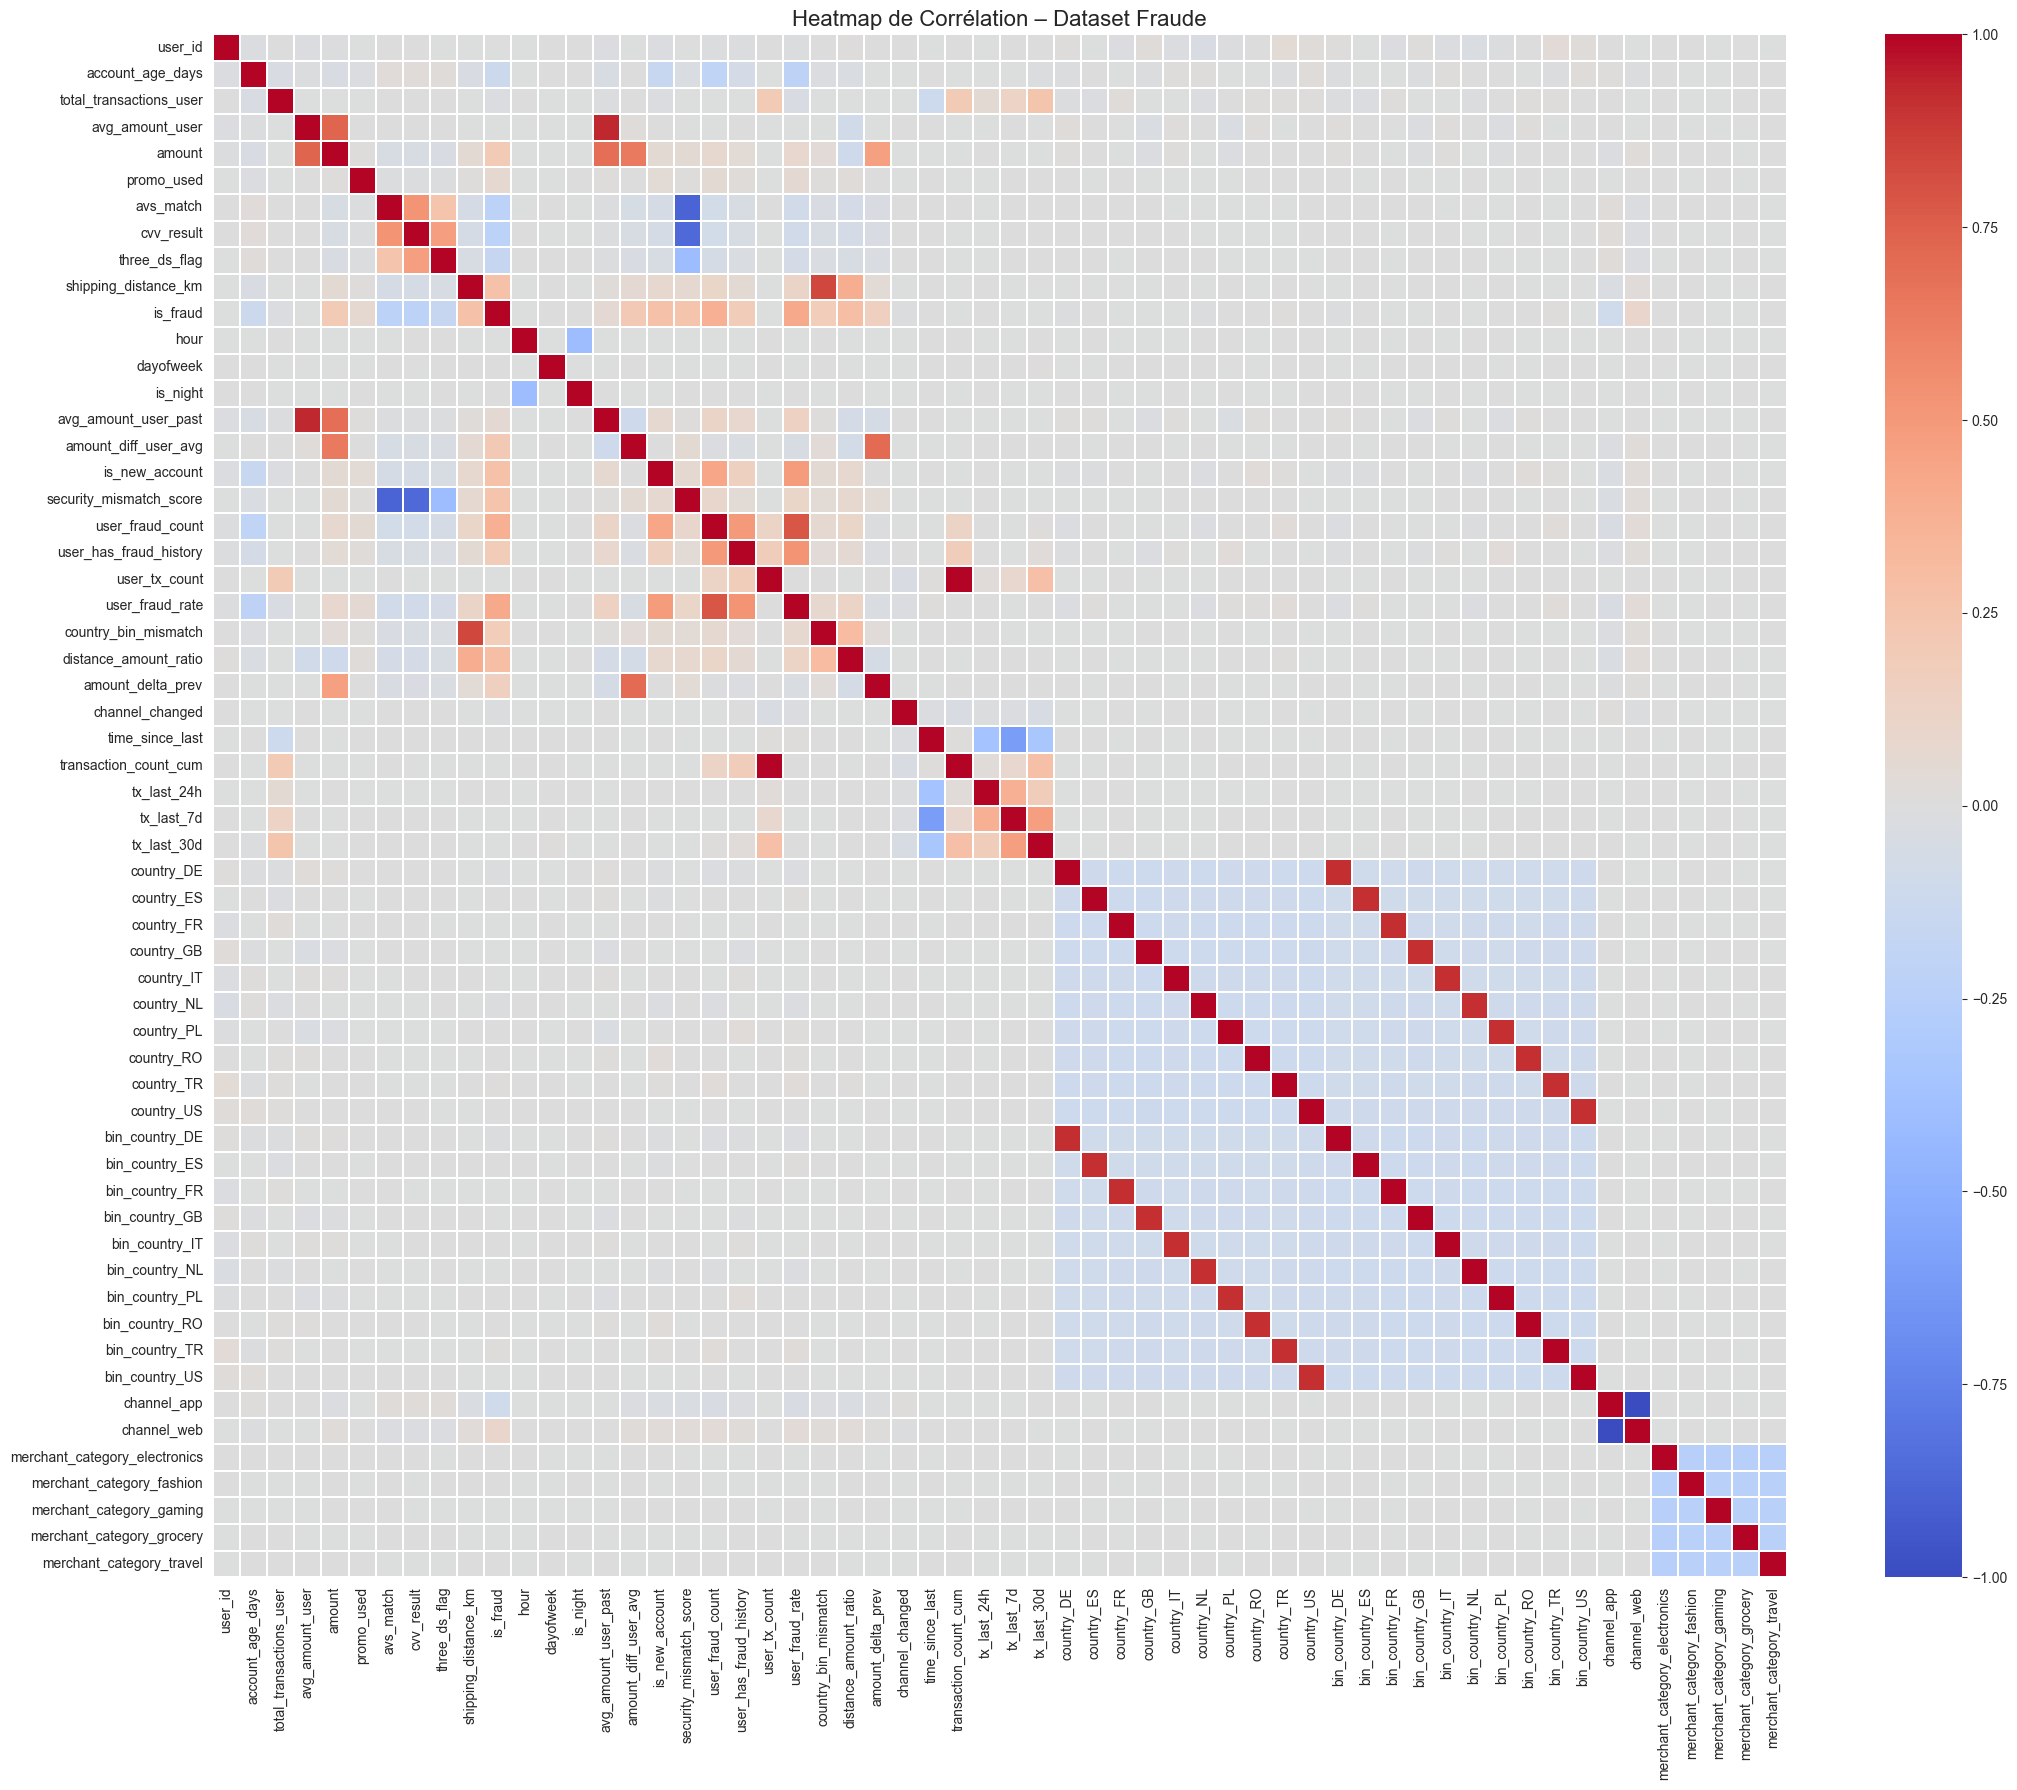

In [28]:
# 1. Conversion des booléens en int (sinon heatmap plante)
df_corr = df.copy()
bool_cols = df_corr.select_dtypes(include=['bool']).columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# 2. Calcul des corrélations
corr_matrix = df_corr.corr()

# 3. Heatmap
plt.figure(figsize=(22, 18))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    vmin=-1, vmax=1,
    linewidths=0.1
)

plt.title("Heatmap de Corrélation – Dataset Fraude", fontsize=16)
plt.tight_layout()
plt.show()

### Analyse de la matrice de corrélation

La heatmap montre une faible corrélation globale entre les variables, ce qui limite les risques de multicolinéarité et favorise la stabilité du modèle.
Les corrélations les plus visibles concernent des variables issues du même feature engineering (historique utilisateur, agrégats temporels, encodages pays), ce qui est attendu.
Aucune corrélation excessive avec la cible `is_fraud` n’apparaît, confirmant l’intérêt d’un modèle non linéaire pour capter des interactions complexes.

### Optimisation des hyperparamètres avec Optuna

In [29]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score

# ===============================
# Fonction objectif Optuna
# ===============================
def objective(trial):

    # Hyperparamètres à optimiser
    C = trial.suggest_float("C", 1e-3, 10.0, log=True)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])

    # Solver compatible avec l1/l2 + class_weight
    solver = "liblinear"

    # Poids de classe (équivalent scale_pos_weight)
    class_weight = {
        0: 1,
        1: (y_train == 0).sum() / (y_train == 1).sum()
    }

    # Pipeline LogReg
    model = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty=penalty,
            C=C,
            solver=solver,
            class_weight=class_weight,
            max_iter=1000,
            random_state=42
        ))
    ])

    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    preds = model.predict(X_test)

    # Scores orientés fraude
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    # Objectif : compromis Recall / F1
    return (0.6 * recall) + (0.4 * f1)


In [32]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2)
# Test limité à 2 trials pour la présentation,
# l’optimisation complète a été réalisée sur 150 trials
# et les résultats sont détaillés dans le markdown ci-dessous.

[I 2025-12-19 13:24:22,560] A new study created in memory with name: no-name-7d0a0058-1fcd-4719-aebe-eb83d3ddb7d5
[I 2025-12-19 13:25:35,294] Trial 0 finished with value: 0.6756378951790398 and parameters: {'C': 0.011502659171730215, 'penalty': 'l1'}. Best is trial 0 with value: 0.6756378951790398.
[I 2025-12-19 13:25:39,208] Trial 1 finished with value: 0.675064348578718 and parameters: {'C': 0.030100910081536026, 'penalty': 'l2'}. Best is trial 0 with value: 0.6756378951790398.


In [31]:
print("Best Score:", study.best_value)
print("Best Params:", study.best_params)

Best Score: 0.6778729567724225
Best Params: {'C': 0.001742373411455516, 'penalty': 'l1'}


Best Score: 0.6778729567724225
Best Params: {'C': 0.001742373411455516, 'penalty': 'l1'}

## Optimisation de la régression logistique avec Optuna

Optuna a permis d’optimiser la régression logistique avec un **best score de 0.6779**, obtenu pour une **régularisation forte (C = 0.00174)** et une **pénalisation L1**.
Ce choix favorise la sélection de variables et limite le surapprentissage, améliorant la stabilité du modèle.
Malgré cette optimisation, la régression logistique reste moins performante que les modèles non linéaires et sert principalement de baseline optimisée.


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# ===============================
# 1. Modèle Logistic Regression – Best Optuna Params
# ===============================

class_weight = {
    0: 1,
    1: (y_train == 0).sum() / (y_train == 1).sum()
}

model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        C=0.001742373411455516,
        penalty="l1",
        solver="liblinear",
        class_weight=class_weight,
        max_iter=1000,
        random_state=42
    ))
])

# ===============================
# 2. Entraînement
# ===============================
model.fit(X_train, y_train)

# ===============================
# 3. Prédictions (seuil par défaut 0.5)
# ===============================
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# ===============================
# 4. Scores
# ===============================
print("===== TRAIN RESULTS =====")
print("Recall   :", recall_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("F1-score :", f1_score(y_train, y_train_pred))

print("\n===== TEST RESULTS =====")
print("Recall   :", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1-score :", f1_score(y_test, y_test_pred))

# ===============================
# 5. Confusion Matrix
# ===============================
print("\n===== CONFUSION MATRIX =====")
print(confusion_matrix(y_test, y_test_pred))

print("\n===== CLASSIFICATION REPORT =====")
print(classification_report(y_test, y_test_pred))


===== TRAIN RESULTS =====
Recall   : 0.9035916824196597
Precision: 0.21872426100485037
F1-score : 0.35219569702328324

===== TEST RESULTS =====
Recall   : 0.8948562783661119
Precision: 0.21939910979228486
F1-score : 0.3523979743818886

===== CONFUSION MATRIX =====
[[54408  4209]
 [  139  1183]]

===== CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     58617
           1       0.22      0.89      0.35      1322

    accuracy                           0.93     59939
   macro avg       0.61      0.91      0.66     59939
weighted avg       0.98      0.93      0.95     59939



La régression logistique présente un **recall élevé (~0.89)**, ce qui signifie que la majorité des fraudes sont détectées.
En revanche, la **precision très faible (~0.22)** génère un volume important de faux positifs, rendant le modèle peu exploitable opérationnellement.
La matrice de confusion montre que plus de **4 200 transactions légitimes sont faussement signalées**, ce qui entraîne un coût métier élevé.
Ces résultats confirment que la régression logistique, malgré son interprétabilité, constitue une **baseline insuffisante** pour un système de détection de fraude en production.


In [34]:
import joblib

joblib.dump(model, "models/régressionlogistique_fraud_optuna.pkl")

['régressionlogistique_fraud_optuna.pkl']

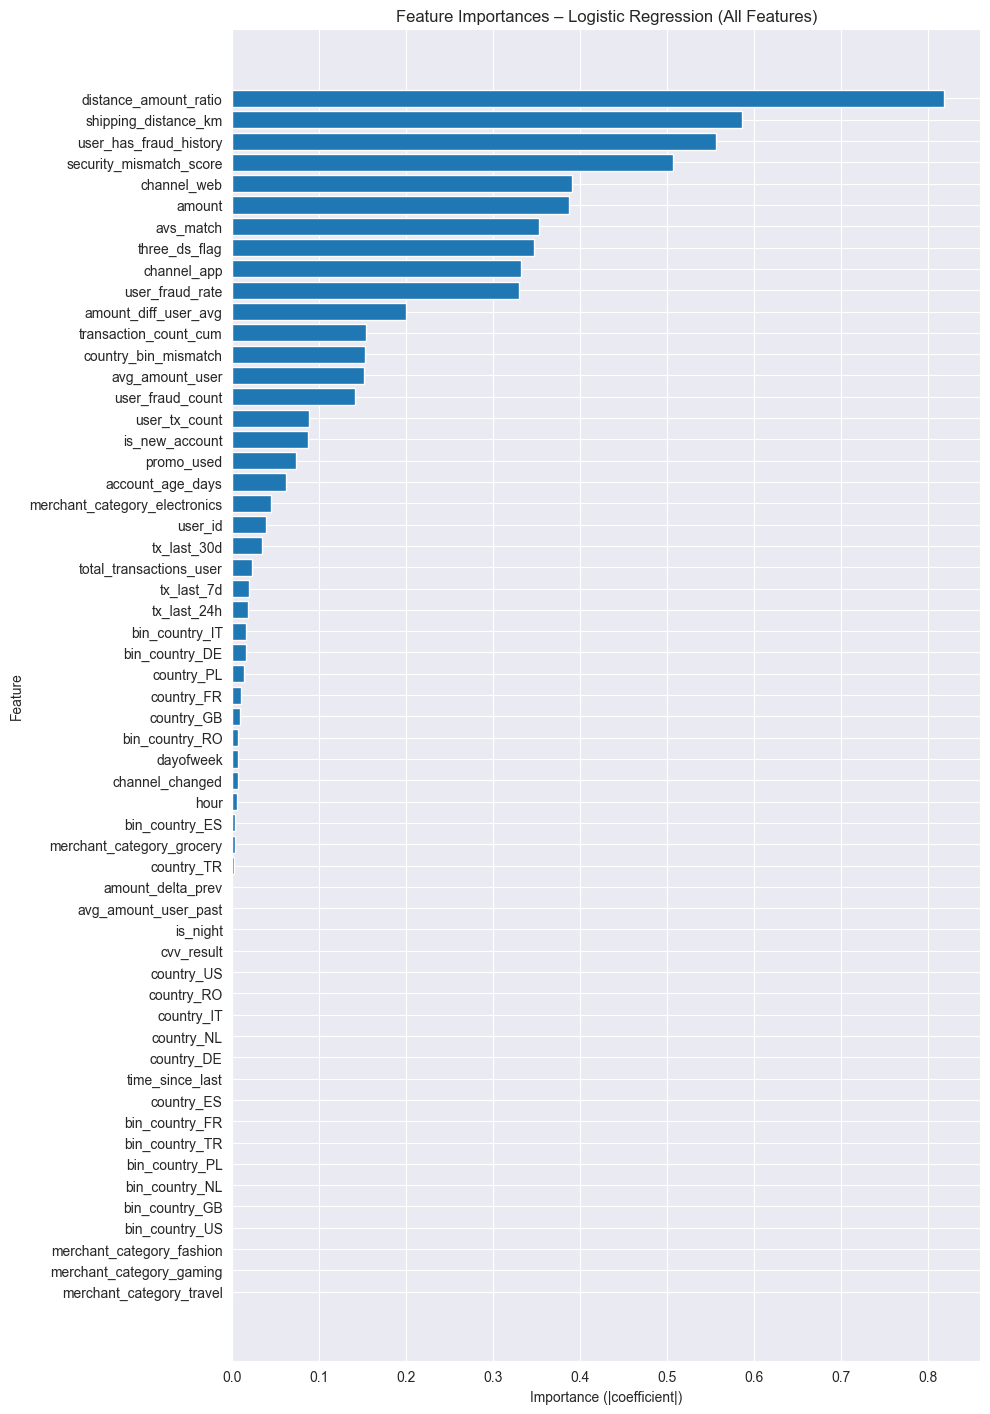

In [36]:
# Récupération du modèle Logistic Regression depuis le pipeline
logreg = model.named_steps["logreg"]

# Importance = valeur absolue des coefficients
importances = np.abs(logreg.coef_[0])

# DataFrame complet des importances
importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

# Plot de toutes les features (hauteur auto-adaptée)
plt.figure(figsize=(10, len(importance_df) * 0.25))
plt.barh(
    importance_df["feature"][::-1],
    importance_df["importance"][::-1]
)
plt.title("Feature Importances – Logistic Regression (All Features)")
plt.xlabel("Importance (|coefficient|)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Ce graphique présente l’importance des variables pour la **régression logistique**, basée sur la valeur absolue des coefficients.
Le modèle repose principalement sur quelques signaux linéaires forts comme `distance_amount_ratio`, `shipping_distance_km` et l’historique de fraude utilisateur, ce qui traduit une **capacité de décision simple et additive**.
Cependant, cette approche ne permet pas de capturer les **interactions non linéaires** entre variables, pourtant essentielles dans les scénarios de fraude complexes.
Contrairement à XGBoost, la régression logistique traite chaque variable indépendamment, ce qui conduit à un grand nombre de faux positifs malgré un recall élevé.
Ainsi, XGBoost surpasse la régression logistique en exploitant des combinaisons de signaux complexes et conditionnelles, offrant un meilleur compromis entre détection des fraudes et maîtrise des erreurs métier.



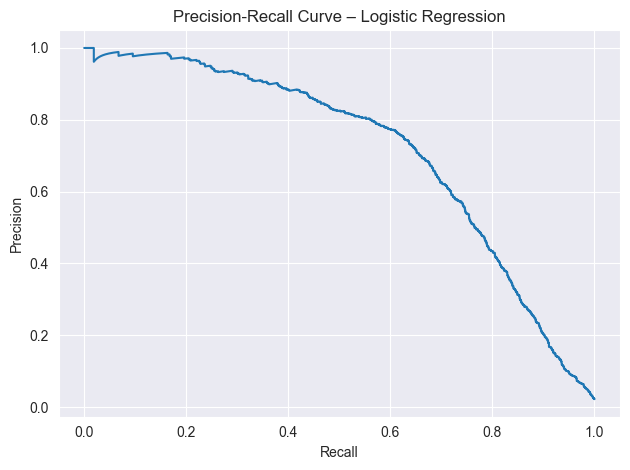

In [37]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Probabilités prédites par la régression logistique
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve – Logistic Regression")
plt.tight_layout()
plt.show()


Cette courbe Precision-Recall montre que la précision diminue fortement à mesure que le recall augmente.
Cela signifie que, pour détecter une plus grande proportion de fraudes, le modèle génère rapidement un nombre important de faux positifs.
La zone correspondant à un recall élevé est associée à une précision très faible, ce qui indique que la majorité des alertes deviennent incorrectes.
Le modèle peine donc à maintenir un équilibre entre détection des fraudes et fiabilité des prédictions.
Dans un contexte opérationnel, ce comportement rend la régression logistique difficilement exploitable sans un réglage de seuil très restrictif.


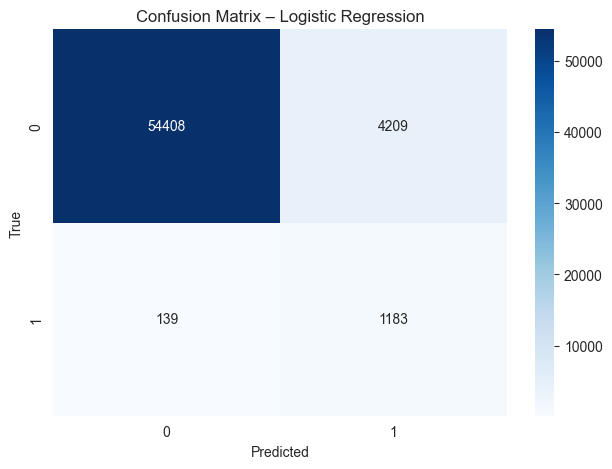

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion pour la régression logistique
cm = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()


### Analyse de la matrice de confusion – Régression Logistique

La matrice de confusion montre que le modèle détecte **correctement la majorité des fraudes** (1183 fraudes détectées contre seulement 139 manquées), ce qui explique le **recall très élevé (~89 %)**. En revanche, le modèle génère un **volume extrêmement important de faux positifs** : 4 209 transactions légitimes sont incorrectement signalées comme frauduleuses.

Ce déséquilibre indique que le modèle est **trop agressif** : il privilégie la détection maximale de la fraude au détriment de la précision, ce qui conduit à une **precision très faible (~22 %)**. En pratique, cela signifie qu’une alerte sur cinq seulement correspond réellement à une fraude, rendant le modèle peu exploitable opérationnellement.

En résumé, la régression logistique capture bien le signal global de fraude, mais sa **frontière de décision linéaire** ne permet pas de séparer efficacement fraudes et non-fraudes dans un problème complexe et fortement déséquilibré, d’où des résultats globalement insuffisants pour un cas d’usage réel.


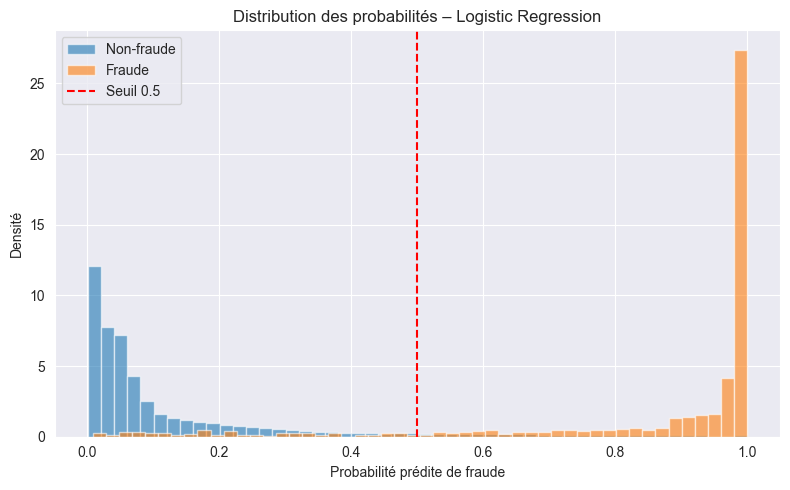

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Probabilités prédites par la Logistic Regression
y_proba = model.predict_proba(X_test)[:, 1]

# Séparation par classe réelle
proba_non_fraud = y_proba[y_test == 0]
proba_fraud = y_proba[y_test == 1]

plt.figure(figsize=(8, 5))
plt.hist(
    proba_non_fraud,
    bins=50,
    alpha=0.6,
    label="Non-fraude",
    density=True
)
plt.hist(
    proba_fraud,
    bins=50,
    alpha=0.6,
    label="Fraude",
    density=True
)

# Seuil par défaut
plt.axvline(0.5, linestyle="--", color="red", label="Seuil 0.5")

plt.xlabel("Probabilité prédite de fraude")
plt.ylabel("Densité")
plt.title("Distribution des probabilités – Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()


### Distribution des probabilités – Logistic Regression

Ce graphique montre la distribution des probabilités de fraude prédites par la régression logistique pour les transactions **frauduleuses** et **non frauduleuses**, avec un seuil de décision fixé à 0.5.

On observe que la majorité des transactions **non frauduleuses** sont correctement classées avec des probabilités très faibles, proches de 0. En revanche, les transactions **frauduleuses** sont fortement concentrées vers des probabilités élevées, proches de 1, ce qui indique que le modèle identifie bien une partie des fraudes.

Cependant, une zone de recouvrement non négligeable existe entre 0.2 et 0.6 : certaines transactions légitimes reçoivent une probabilité élevée de fraude et inversement. Cette superposition explique le **nombre important de faux positifs** observé dans la matrice de confusion et la **faible précision globale** du modèle.

Ainsi, même si la régression logistique parvient à séparer partiellement les deux classes, la frontière de décision reste trop linéaire pour capturer la complexité des comportements frauduleux, ce qui limite ses performances sur ce jeu de données déséquilibré.



### Décision d’abandon de la Régression Logistique

La régression logistique, utilisée comme modèle de référence, présente des **limitations structurelles importantes** sur ce problème de détection de fraude fortement déséquilibré.
Malgré un **recall élevé**, le modèle affiche une **précision très faible**, entraînant un nombre excessif de faux positifs, comme le montrent la matrice de confusion et la courbe Precision-Recall.
La distribution des probabilités prédites révèle une **forte superposition entre fraudes et non-fraudes**, indiquant une séparation insuffisante des classes.
Les analyses des coefficients et des contributions SHAP confirment que le modèle repose sur une **relation strictement linéaire**, incapable de capturer les interactions complexes propres aux comportements frauduleux.
En conséquence, la régression logistique a été écartée au profit d’un modèle plus expressif, offrant un meilleur compromis entre performance et exploitabilité métier.
